In [ ]:
import cv2
import numpy as np
import os
import glob
 
# Defining the dimensions of checkerboard
CHECKERBOARD = (6,9)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = [] 
 
 
# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
 
# Extracting path of individual image stored in a given directory
images = glob.glob('./Images/*.jpg')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    # If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
     
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
         
        imgpoints.append(corners2)
 
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
     
    cv2.imshow('img',img)
    cv2.waitKey(0)
 
cv2.destroyAllWindows()
 
h,w = img.shape[:2]
 
"""
Performing camera calibration by 
passing the value of known 3D points (objpoints)
and corresponding pixel coordinates of the 
detected corners (imgpoints)
"""
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
 
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

: 

In [1]:
import numpy as np
import cv2 as cv
import glob
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('./Images/*.jpg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        cv.imshow('img', img)
        #cv.waitKey(500)
cv.destroyAllWindows()

In [7]:
objp[40]

array([5., 5., 0.], dtype=float32)

In [3]:
import cv2
import numpy as np
import os
import glob
  
  
# Define the dimensions of checkerboard
CHECKERBOARD = (6, 9)
  
  
# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS + 
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
  
  
# Vector for 3D points
threedpoints = []
  
# Vector for 2D points
twodpoints = []
  
  
#  3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0] 
                      * CHECKERBOARD[1], 
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
  
  
# Extracting path of individual image stored
# in a given directory. Since no path is
# specified, it will take current directory
# jpg files alone
images = glob.glob('./Images/*.jpg')
  
for filename in images:
    image = cv2.imread(filename)
    print(type(image))
    break
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
    # Find the chess board corners
    # If desired number of corners are
    # found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(
                    grayColor, CHECKERBOARD, 
                    cv2.CALIB_CB_ADAPTIVE_THRESH 
                    + cv2.CALIB_CB_FAST_CHECK + 
                    cv2.CALIB_CB_NORMALIZE_IMAGE)
  
    # If desired number of corners can be detected then,
    # refine the pixel coordinates and display
    # them on the images of checker board
    if ret == True:
        threedpoints.append(objectp3d)
  
        # Refining pixel coordinates
        # for given 2d points.
        corners2 = cv2.cornerSubPix(
            grayColor, corners, (11, 11), (-1, -1), criteria)
  
        twodpoints.append(corners2)
  
        # Draw and display the corners
        image = cv2.drawChessboardCorners(image, 
                                          CHECKERBOARD, 
                                          corners2, ret)
  
    cv2.imshow('img', image)
    cv2.waitKey(100)
  
cv2.destroyAllWindows()
  
h, w = image.shape[:2]
  
  
# Perform camera calibration by
# passing the value of above found out 3D points (threedpoints)
# and its corresponding pixel coordinates of the
# detected corners (twodpoints)
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
    threedpoints, twodpoints, grayColor.shape[::-1], None, None)
  
  
# Displaying required output
print(" Camera matrix:")
print(matrix)
  
print("\n Distortion coefficient:")
print(distortion)
  
print("\n Rotation Vectors:")
print(r_vecs)
  
print("\n Translation Vectors:")
print(t_vecs)

<class 'numpy.ndarray'>


NameError: name 'grayColor' is not defined

In [1]:
import cv2
  
  
# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    #print(type(frame))
    grayColor = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()  

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

In [1]:
import cv2
import numpy as np
import os
import glob
from extrinsic2pyramid.util.camera_pose_visualizer import CameraPoseVisualizer  
  
# Define the dimensions of checkerboard
CHECKERBOARD = (6, 9)
  
  
# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS + 
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
  
  
# Vector for 3D points
threedpoints = []
  
# Vector for 2D points
twodpoints = []
  
  
#  3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0] 
                      * CHECKERBOARD[1], 
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
  
  
# Extracting path of individual image stored
# in a given directory. Since no path is
# specified, it will take current directory
# jpg files alone
#images = glob.glob('./Images/*.jpg')
video_feed = cv2.VideoCapture(0)
video_feed.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
video_feed.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
i = 0

while i < 200:
    _, image = video_feed.read()
    #cv2.imshow('frame', image)
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #print(i)
    i = i + 1
    # Find the chess board corners
    # If desired number of corners are
    # found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(
                    grayColor, CHECKERBOARD, 
                    cv2.CALIB_CB_ADAPTIVE_THRESH 
                    + cv2.CALIB_CB_FAST_CHECK + 
                    cv2.CALIB_CB_NORMALIZE_IMAGE)
  
    # If desired number of corners can be detected then,
    # refine the pixel coordinates and display
    # them on the images of checker board
    if ret == True:
        threedpoints.append(objectp3d)
  
        # Refining pixel coordinates
        # for given 2d points.
        corners2 = cv2.cornerSubPix(
            grayColor, corners, (11, 11), (-1, -1), criteria)
  
        twodpoints.append(corners2)
  
        # Draw and display the corners
        image = cv2.drawChessboardCorners(image, 
                                          CHECKERBOARD, 
                                          corners2, ret)
        # ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
        # threedpoints, twodpoints, grayColor.shape[::-1], None, None)
        # rotation, _ = cv2.Rodrigues(r_vecs[-1])
        # translation = t_vecs[-1]
        # array = np.array([0, 0, 0, 1], ndmin=2)
        # a = np.concatenate((rotation, translation), axis=1)
        # a = np.concatenate((a, array))
        # visualizer = CameraPoseVisualizer([-50, 50], [-50, 50], [0, 50])
        # visualizer.extrinsic2pyramid(a, 'c', 10)
        # visualizer.show()
        #print(len(r_vecs))
        
  
    cv2.imshow('img', image)
    cv2.waitKey(100)
  
cv2.destroyAllWindows()
  
h, w = image.shape[:2]
  
  
# Perform camera calibration by
# passing the value of above found out 3D points (threedpoints)
# and its corresponding pixel coordinates of the
# detected corners (twodpoints)
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
    threedpoints, twodpoints, grayColor.shape[::-1], None, None)
  
  
# Displaying required output
# print(" Camera matrix:")
# print(matrix)
  
# print("\n Distortion coefficient:")
# print(distortion)
  
# print("\n Rotation Vectors:")
# print(r_vecs)
  
# print("\n Translation Vectors:")

# print(t_vecs)

In [6]:
np.save('matrix.npy', matrix, False)
np.save('distortion.npy', distortion, False)

In [4]:
np.load('matrix.npy')

array([[409.3193414 ,   0.        , 612.16358528],
       [  0.        , 471.0494272 , 368.26110176],
       [  0.        ,   0.        ,   1.        ]])

In [5]:
matrix

array([[409.3193414 ,   0.        , 612.16358528],
       [  0.        , 471.0494272 , 368.26110176],
       [  0.        ,   0.        ,   1.        ]])

In [1]:
import cv2
import numpy as np
import os
import glob
from extrinsic2pyramid.util.camera_pose_visualizer import CameraPoseVisualizer  


def draw(img, corners, imgpts):
    imgpts = (np.rint(imgpts)).astype(int)
    corner = tuple(corners[0].ravel())
    corner_1 = tuple(corners[0].ravel())
    corner_2 = tuple(corners[8].ravel())
    corner_3 = tuple(corners[0].ravel())
    x = [int(i) for a, i in enumerate(corner)]
    corner = tuple(x)
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img



# Define the dimensions of checkerboard
CHECKERBOARD = (6, 9)
  
  
# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS + 
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
  
  
# Vector for 3D points
threedpoints = []
  
# Vector for 2D points
twodpoints = []
  
  
#  3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0] 
                      * CHECKERBOARD[1], 
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
  
  
# Extracting path of individual image stored
# in a given directory. Since no path is
# specified, it will take current directory
# jpg files alone
#images = glob.glob('./Images/*.jpg')
video_feed = cv2.VideoCapture(0)
video_feed.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
video_feed.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
i = 0
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
while i < 100:
    _, image = video_feed.read()
    #cv2.imshow('frame', image)
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #print(i)
    i = i + 1
    # Find the chess board corners
    # If desired number of corners are
    # found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(
                    grayColor, CHECKERBOARD, 
                    cv2.CALIB_CB_ADAPTIVE_THRESH 
                    + cv2.CALIB_CB_FAST_CHECK + 
                    cv2.CALIB_CB_NORMALIZE_IMAGE)
  
    # If desired number of corners can be detected then,
    # refine the pixel coordinates and display
    # them on the images of checker board
    if ret == True:
        threedpoints.append(objectp3d)
  
        # Refining pixel coordinates
        # for given 2d points.
        corners2 = cv2.cornerSubPix(
            grayColor, corners, (11, 11), (-1, -1), criteria)
  
        twodpoints.append(corners2)
  
        # Draw and display the corners
        image = cv2.drawChessboardCorners(image, 
                                          CHECKERBOARD, 
                                          corners2, ret)
        ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
        threedpoints, twodpoints, grayColor.shape[::-1], None, None)
        print(matrix)
        imgpts, jac = cv2.projectPoints(axis, r_vecs[0], t_vecs[0], matrix, distortion)
        img = draw(image,corners2,imgpts)
        cv2.imshow('img',img)
        #print(len(r_vecs))
        
  
    cv2.imshow('img', image)
    cv2.waitKey(100)
  
cv2.destroyAllWindows()
  
h, w = image.shape[:2]
  
  
# Perform camera calibration by
# passing the value of above found out 3D points (threedpoints)
# and its corresponding pixel coordinates of the
# detected corners (twodpoints)
# ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
#     threedpoints, twodpoints, grayColor.shape[::-1], None, None)
  
  
# Displaying required output
# print(" Camera matrix:")
# print(matrix)
  
# print("\n Distortion coefficient:")
# print(distortion)
  
# print("\n Rotation Vectors:")
# print(r_vecs)
  
# print("\n Translation Vectors:")

# print(t_vecs)

[[210.57328577   0.         658.86671581]
 [  0.         531.16624719 350.28352728]
 [  0.           0.           1.        ]]
[[283.29860173   0.         552.45012914]
 [  0.         616.96961705 482.8381872 ]
 [  0.           0.           1.        ]]
[[312.65885773   0.         593.15191369]
 [  0.         477.59515099 427.07345452]
 [  0.           0.           1.        ]]
[[302.3288481    0.         586.39380387]
 [  0.         469.66291388 483.57369699]
 [  0.           0.           1.        ]]
[[269.44483763   0.         570.35417939]
 [  0.         529.34751991 491.24457221]
 [  0.           0.           1.        ]]
[[283.26384241   0.         562.03373076]
 [  0.         625.92474333 494.65482537]
 [  0.           0.           1.        ]]
[[420.38482862   0.         577.21150402]
 [  0.         617.3159937  424.42791289]
 [  0.           0.           1.        ]]
[[350.14320211   0.         551.98911671]
 [  0.         616.71790495 480.33086578]
 [  0.           0.        

KeyboardInterrupt: 

: 

In [19]:
corner = tuple(corners[0].ravel())
x = [int(i) for a, i in enumerate(corner)]
corner = tuple(x)
type(corner[0])

int

In [34]:
a = (np.rint(imgpts)).astype(int)
a

array([[[199, 169]],

       [[269, 237]],

       [[160, 205]]])

In [23]:
rotation, _ = cv2.Rodrigues(r_vecs[0])
rotation.shape

(3, 3)

In [32]:
a = np.concatenate((rotation, translation), axis=1)
array = np.array([0, 0, 0, 1], ndmin=2)
a = np.concatenate((a, array))
a.shape

(4, 4)

initialize camera pose visualizer


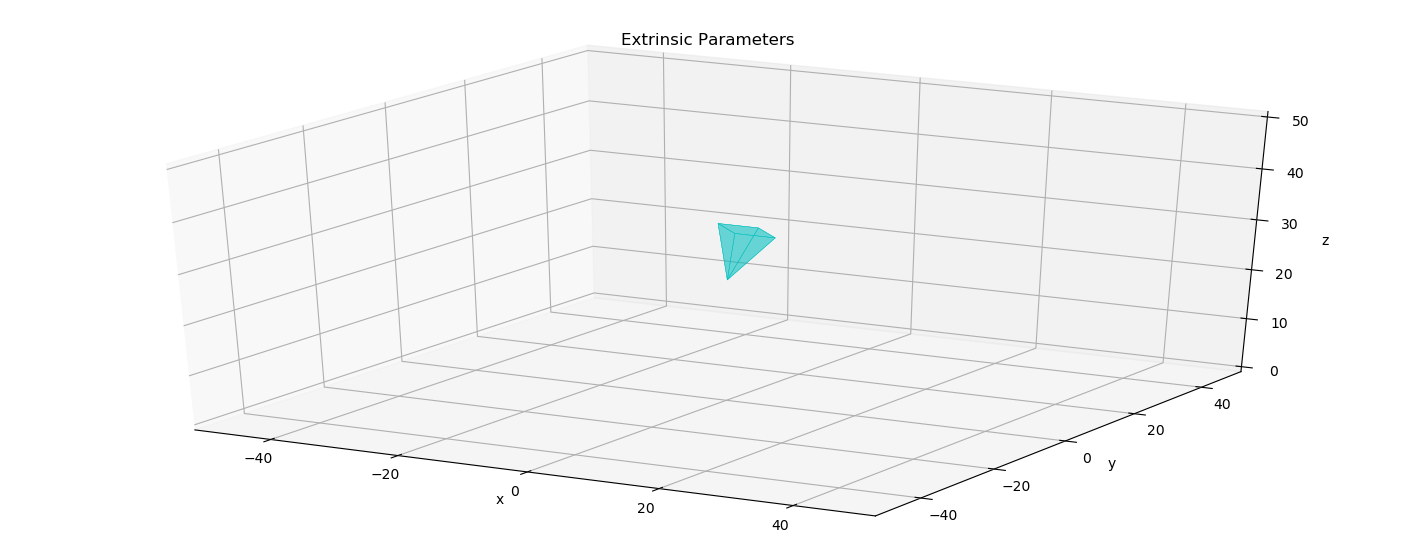

In [37]:
from extrinsic2pyramid.util.camera_pose_visualizer import CameraPoseVisualizer
index = 50
array = np.array([0, 0, 0, 1], ndmin=2)
translation = t_vecs[index]
rotation, _ = cv2.Rodrigues(r_vecs[index])

a = np.concatenate((rotation, translation), axis=1)
a = np.concatenate((a, array))
visualizer = CameraPoseVisualizer([-50, 50], [-50, 50], [0, 50])
visualizer.extrinsic2pyramid(a, 'c', 10)
visualizer.show()

In [39]:
cv2.camera_calibration_show_extrinsics()

AttributeError: module 'cv2' has no attribute 'camera_calibration_show_extrinsics'

In [2]:
import numpy as np
import cv2 as cv



def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img
CHECKERBOARD = (6, 9)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((1, CHECKERBOARD[0] 
                      * CHECKERBOARD[1], 
                      3), np.float32)
objp[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

video_feed = cv.VideoCapture(0)
i = 0

while i < 100:
    _, image = video_feed.read()
    cv.imshow('frame', image)
    grayColor = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    
    ret, corners = cv.findChessboardCorners(
                    grayColor, CHECKERBOARD, 
                    cv.CALIB_CB_ADAPTIVE_THRESH 
                    + cv.CALIB_CB_FAST_CHECK + 
                    cv.CALIB_CB_NORMALIZE_IMAGE)
    if ret == True:
        corners2 = cv.cornerSubPix(grayColor,corners,(11,11),(-1,-1),criteria)
        # Find the rotation and translation vectors.
        ret, matrix, distortion, r_vecs, t_vecs = cv.calibrateCamera(
        objp, corners2, grayColor.shape[::-1], None, None)
        # project 3D points to image plane
        imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, matrix, dist)
        img = draw(img,corners2,imgpts)
        cv.imshow('img',img)
        k = cv.waitKey(0) & 0xFF
        if k == ord('s'):
            cv.imwrite(fname[:6]+'.png', img)
        i = i + 1
#cv.destroyAllWindows()

error: OpenCV(4.7.0) /io/opencv/modules/calib3d/src/calibration.cpp:3394: error: (-2:Unspecified error) in function 'void cv::collectCalibrationData(cv::InputArrayOfArrays, cv::InputArrayOfArrays, cv::InputArrayOfArrays, int, cv::Mat&, cv::Mat&, cv::Mat*, cv::Mat&)'
>  (expected: 'nimages == (int)imagePoints1.total()'), where
>     'nimages' is 1
> must be equal to
>     '(int)imagePoints1.total()' is 54


: 

In [4]:
import cv2
import numpy as np
import os
import glob
from extrinsic2pyramid.util.camera_pose_visualizer import CameraPoseVisualizer  


def draw(img, corners, imgpts):
    
    imgpts = (np.rint(imgpts)).astype(int)
    corner = tuple(corners[0].ravel())
    corner_1 = tuple(corners[0].ravel())
    corner_2 = tuple(corners[8].ravel())
    corner_3 = tuple(corners[0].ravel())
    x = [int(i) for a, i in enumerate(corner)]
    corner = tuple(x)
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img



# Define the dimensions of checkerboard
CHECKERBOARD = (6, 9)
  
  
# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS + 
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
  
  
# Vector for 3D points
threedpoints = []
  
# Vector for 2D points
twodpoints = []
  
  
#  3D points real world coordinates
objectp3d = np.zeros((CHECKERBOARD[0] 
                      * CHECKERBOARD[1], 
                      3), np.float32)
objectp3d[:, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
  
  
# Extracting path of individual image stored
# in a given directory. Since no path is
# specified, it will take current directory
# jpg files alone
#images = glob.glob('./Images/*.jpg')
video_feed = cv2.VideoCapture(0)
i = 0
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
while i < 100:
    _, image = video_feed.read()
    #cv2.imshow('frame', image)
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #print(i)
    i = i + 1
    # Find the chess board corners
    # If desired number of corners are
    # found in the image then ret = true
    ret, corners = cv2.findChessboardCorners( grayColor, CHECKERBOARD, None)
  
    # If desired number of corners can be detected then,
    # refine the pixel coordinates and display
    # them on the images of checker board
    if ret == True:
        threedpoints.append(objectp3d)
  
        # Refining pixel coordinates
        # for given 2d points.
        corners2 = cv2.cornerSubPix(
            grayColor, corners, (11, 11), (-1, -1), criteria)
  
        twodpoints.append(corners2)
  
        # Draw and display the corners
        # image = cv2.drawChessboardCorners(image, 
        #                                   CHECKERBOARD, 
        #                                   corners2, ret)
        ret, r_vecs, t_vecs = cv2.solvePnP(objectp3d, corners2, matrix, distortion)
        imgpts, jac = cv2.projectPoints(axis, r_vecs, t_vecs, matrix, distortion)
        img = draw(image,corners2,imgpts)
        cv2.imshow('img',img)
        #print(len(r_vecs))
        
  
    cv2.imshow('img', image)
    cv2.waitKey(100)
  
cv2.destroyAllWindows()
  
h, w = image.shape[:2]
  
  
# Perform camera calibration by
# passing the value of above found out 3D points (threedpoints)
# and its corresponding pixel coordinates of the
# detected corners (twodpoints)
# ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
#     threedpoints, twodpoints, grayColor.shape[::-1], None, None)
  
  
# Displaying required output
# print(" Camera matrix:")
# print(matrix)
  
# print("\n Distortion coefficient:")
# print(distortion)
  
# print("\n Rotation Vectors:")
# print(r_vecs)
  
# print("\n Translation Vectors:")

# print(t_vecs)

In [10]:
len(r_vecs)

52

In [9]:
type(threedpoints)

list

In [10]:
import mediapipe as mp



(640, 480)

In [3]:
import numpy as np
a = np.array([1, 2, 3, 4])
np.save('example.a', a)

In [5]:
b = np.load('example.a.npy')
b

array([1, 2, 3, 4])

In [1]:
import numpy as np
matrix = np.load('matrix.npy')
distortion = np.load('distortion.npy')